# Introduction:
 place one here

## Major steps 
1. Set up a Super Mario Bros game Enviornment 
2. Preocess the game for Reinforcement Learning 
3. Train the model 
4. Save and load the trained model in different enviornments 
---


## Tools used (add as needed)
---
### OpenAI Gym
- describe
### Mario Gym
- describe
### Nes-Py
- describe

---


## Step 1. Set up Super Mario Bros
---

## Install dependencies and import needed libraries 
---
Install the needed dependencies of the Super Mario Gym and the Nes-py Emulator. Additonally import the needed libraries in order to build the AI

In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py 
print("Done setting up initial dependencies")

You should consider upgrading via the 'c:\users\tj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#import the game gym
import gym_super_mario_bros
#import the Joypad Wrapper 
from nes_py.wrappers import JoypadSpace
#import the controls (simplified)
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

It is very important to have simplfied inputs for the AI as more complicated inputs can lead to it having a harder time learning, to show this we can observe the actions Mario can take by viewing the states

In [3]:
print(SIMPLE_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


As we can see Mario can only take 7 actions (note: NOOP means no operation/ do nothing)

In [4]:
#Setup the game
env = gym_super_mario_bros.make('SuperMarioBros-v0') #create the game gym (world 1-1)
env = JoypadSpace(env,SIMPLE_MOVEMENT) #simplify the number of inputs


To check how many actions Mario can take we can simply view it 

In [5]:
print(env.action_space)

Discrete(7)


## Play the game 
---
- outline
    - playing the game to test the enviornment
        - congrats python can play the game
    - print out the results of each frame 
    - try it yourself option (change the number of steps to take)
    - note how long it takes if the standard 10,000 steps are taken 

In [6]:
done = True #check if Mario has finished a stage and to restart the session 

for step in range(100): #should be 100000
    score = 0
    if done:
        #start the game
        env.reset()
    #get information on each step/frame of the game and also allow mario to take a random action 
    state,reward,done,info = env.step(env.action_space.sample())
    score+=reward
    #show the state of each frame /step 
    
    #this will create a vary long output feel free to uncomment the print statement below
    print('Frame/step:{} Score:{} done:{}'.format(step,score,done)) 

    #render the gym (leave commented for faster completion time)
    #env.render()
env.close()

Frame/step:0 Score:0 done:False
Frame/step:1 Score:0 done:False
Frame/step:2 Score:0 done:False
Frame/step:3 Score:0 done:False
Frame/step:4 Score:0 done:False
Frame/step:5 Score:1 done:False
Frame/step:6 Score:0 done:False
Frame/step:7 Score:0 done:False
Frame/step:8 Score:1 done:False
Frame/step:9 Score:0 done:False
Frame/step:10 Score:1 done:False
Frame/step:11 Score:0 done:False
Frame/step:12 Score:1 done:False
Frame/step:13 Score:0 done:False
Frame/step:14 Score:1 done:False
Frame/step:15 Score:0 done:False
Frame/step:16 Score:1 done:False
Frame/step:17 Score:1 done:False
Frame/step:18 Score:-1 done:False
Frame/step:19 Score:0 done:False
Frame/step:20 Score:0 done:False
Frame/step:21 Score:0 done:False
Frame/step:22 Score:-1 done:False
Frame/step:23 Score:0 done:False
Frame/step:24 Score:0 done:False
Frame/step:25 Score:0 done:False
Frame/step:26 Score:1 done:False
Frame/step:27 Score:0 done:False
Frame/step:28 Score:0 done:False
Frame/step:29 Score:1 done:False
Frame/step:30 Scor

Since at this stage Mario has not been trained it is likely he will simply be caught on the first pipe until the timer runs out
![image](/img/mario_cannot_jump_high.png)

## Step 2. Pre-processing the enviornment
---
In this step the game's data needs to be proprocessed in order to eliminate any garbage data.
This will involve two steps
1. Convert the image to grayscale in order to simply the data even more 
2. Stack frames together so the agent can read/remember it's previous steps instead of acting on a frame-by-frame basis 

### install and import more dependencies and libaries 

### Installing pytorch 
- This will take a few minutes to install please be patient 
- explain what pytorch is

In [28]:

# Install pytorch
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113



Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


You should consider upgrading via the 'c:\users\tj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



### installing additional Reinforcement learning dependencies 
- This will take a few minutes to install please be patient 
- expain the need for the PPO 

In [29]:
!pip install stable-baselines3[extra]

You should consider upgrading via the 'c:\users\tj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [30]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [31]:
#1. Create the enviornment 
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)

### **The importance of simplifying the enveiornment**
---
As we continue in pre-processing we must convert the enviornment from RGB to grayscale to feed the agent as simple of an enviornment as possible 

To show the difference compare the enviornment with and without the grayscale conversion

### No Pre-Processing 

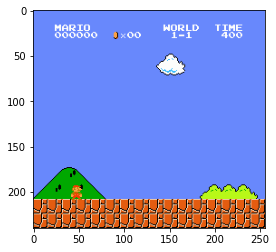

In [32]:
# Create the base environment (no pre-processing)
env_no_pre = gym_super_mario_bros.make('SuperMarioBros-v0')
env_no_pre = JoypadSpace(env, SIMPLE_MOVEMENT)
env_no_pre_state = env_no_pre.reset()
plt.imshow(env_no_pre_state)

We can inspect the shape to see how much information needs to be proccesed

In [12]:
print(env_no_pre_state.shape)

(240, 256, 3)


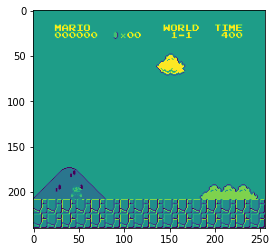

In [13]:
# Create the base environment (with pre processing)
env_w_pre = gym_super_mario_bros.make('SuperMarioBros-v0')
env_w_pre = JoypadSpace(env, SIMPLE_MOVEMENT)
env_w_pre = GrayScaleObservation(env_w_pre, keep_dim=True)
env_w_pre_state = env_w_pre.reset()
plt.imshow(env_w_pre_state)

Let us inpsect the shape of the envionrment now after pre-processing

In [14]:
print(env_w_pre_state.shape)

(240, 256, 1)


In doing so the 3rd element in the shape list went from 3->1 channels thus we have to only process the monochromatic parts
of the enviornment

In [15]:
#3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
#4. Wrap inside the dummy enviornment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [16]:


state = env.reset()



In [17]:
state, reward, done, info = env.step([5])

In this case it is hard to explain what the stacked frame does, however stacked frames alows the agent to see up to 4 of the previous frames in order to gain a better insight on what to do. When shown it would look like this 

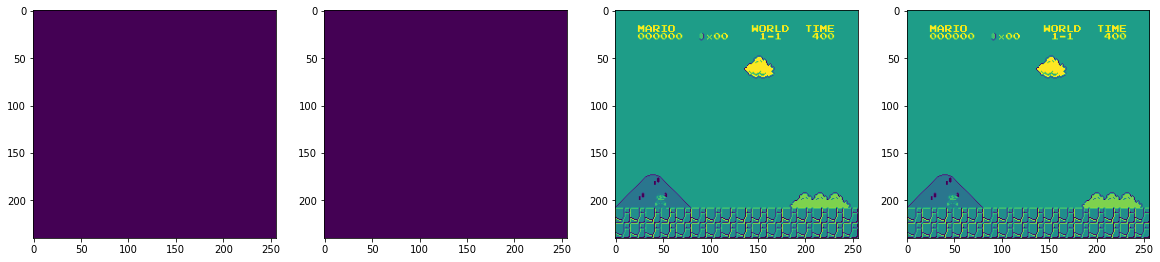

In [18]:

#display 4 frames 
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()



The first 2 frames are purple due to the game not advancing past the intial 2 frames, however if we step through 

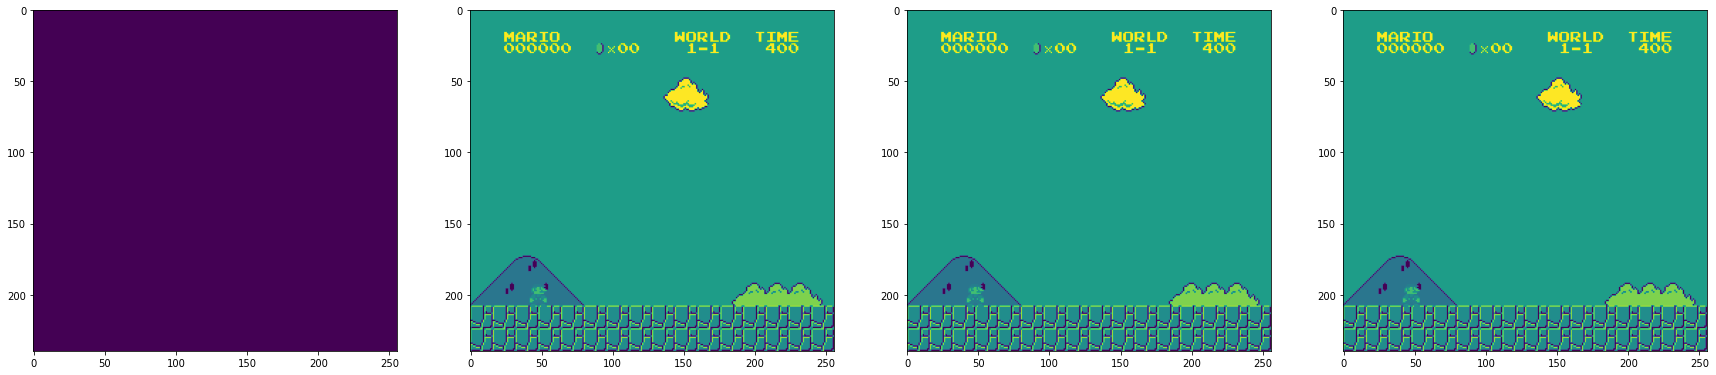

In [19]:
state, reward, done, info = env.step([5]) #run this as many times as you want to see the frames advance 
plt.figure(figsize=(30,32))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

### Step 3. Training the Reinforcement Model
---
This step will be all about training the AI to navigate the enviorntment. This uses reinforcemt learning with Mario
as the agent. Mario will be rewarded for for how far right he makes it in the enviornment. The goal of Mario is to maximize his reward.

The Reinforcement Alogirithm being used is the PPO (Proximal Policy Optimization) algorithm. 



In [38]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models to prevent massive data loss 
from stable_baselines3.common.callbacks import BaseCallback
import torch



Callback class - This is so that the AI can save it's progress after a certain amount of steps in order to prevent massive data lost

In [21]:


class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True



Since it is a good idea to save the model as it changes we will create a directory for the model to be stored at 

In [22]:


CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'



In [41]:
import torch
torch.cuda.is_available()


False

In [34]:


# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)



In [35]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


## training data statistics 
- explain the relavent and needed statistics that come from training 

**This is an extremely long process and will take well over an hour, only run the AI training if you wish to build the model yourself, otherwise continue reading**

In [25]:
# Train the AI model, this is where the AI model starts to learn,timesteps is the amount of frames it will be processing
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_1


c:\users\tj\appdata\local\programs\python\python39\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

## Notes on what to include
- view tensorflow statistics as part of the conclusion 
- include a results section with the model at different parts of training 

### Sources: 
- “Gym-super-mario-bros,” PyPI. [Online]. Available: https://pypi.org/project/gym-super-mario-bros/. [Accessed: 03-May-2022]. 
- J. Schulman, “Proximal policy optimization,” OpenAI, 02-Sep-2020. [Online]. Available: https://openai.com/blog/openai-baselines-ppo/. [Accessed: 04-May-2022]. 